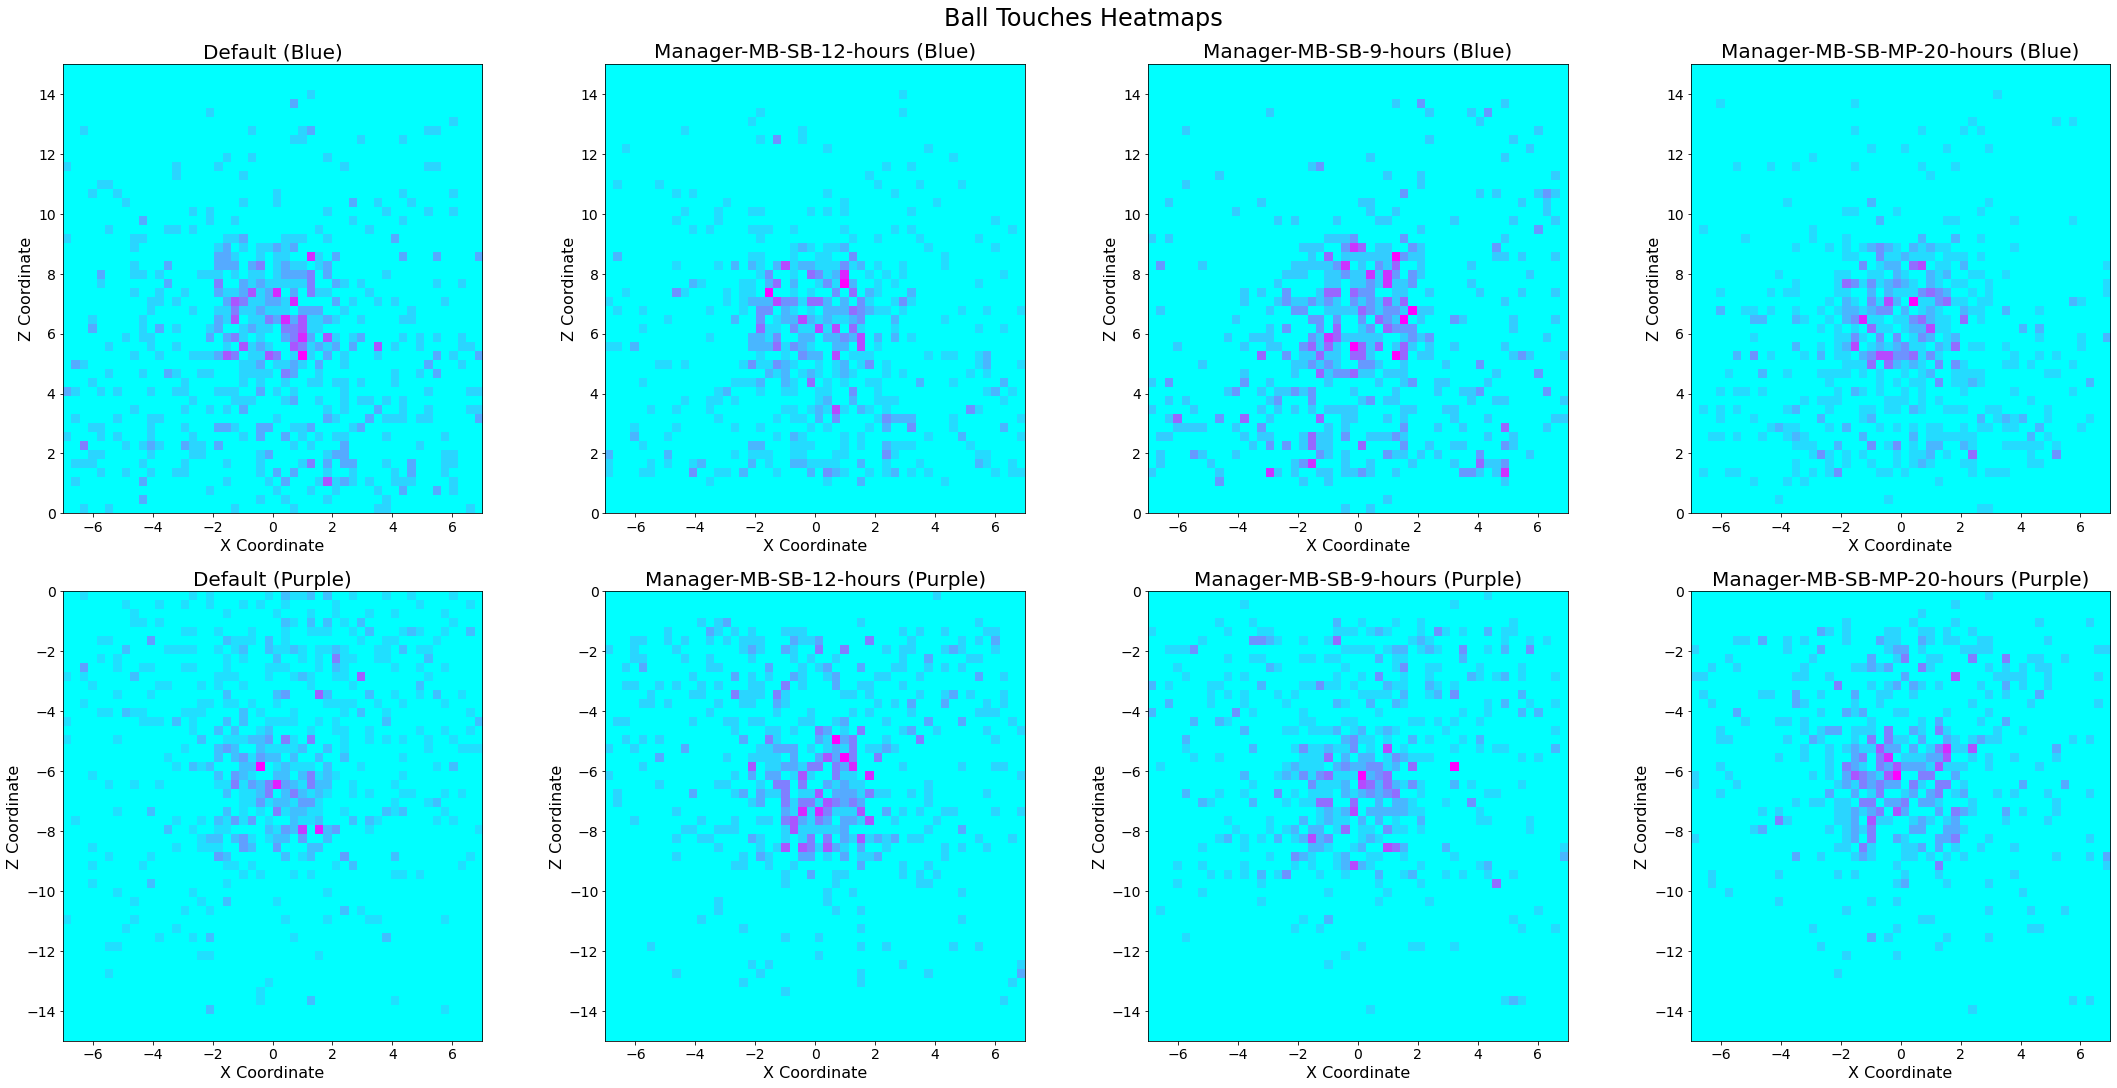

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import re

# Read data from file
file_path = "ballTouches.txt"
with open(file_path, "r") as file:
    logs = file.read()

# Parse the logs to extract behavior and locations
data = defaultdict(list)
pattern = r"'teamName': '([^']+)', 'location': '\(([^)]+)\)'"
matches = re.findall(pattern, logs)

# Sort matches by behavior name
matches.sort(key=lambda x: x[0])

# Separate behaviors based on color
purple_behaviors = [match for match in matches if match[0].endswith('(Purple)')]
blue_behaviors = [match for match in matches if match[0].endswith('(Blue)')]

# Function to process and plot heatmaps
def plot_heatmaps(behaviors_purple, behaviors_blue, title):
    data_purple = defaultdict(list)
    data_blue = defaultdict(list)
    
    for behavior, location in behaviors_purple:
        coords = tuple(map(float, location.split(", ")))
        data_purple[behavior].append(coords)
    
    for behavior, location in behaviors_blue:
        coords = tuple(map(float, location.split(", ")))
        data_blue[behavior].append(coords)
    
    n = max(len(data_purple), len(data_blue))
    fig, axes = plt.subplots(2, n, figsize=(30, 15), constrained_layout=True)
    
    for ax, (behavior, locations) in zip(axes[0, :], data_blue.items()):
        locations = np.array(locations)
        x, y = locations[:, 0], locations[:, 2]  # Take x and z coordinates
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, range=[[-7, 7], [0, 15]])
        
        # Plot heatmap
        ax.imshow(heatmap.T, origin='lower', cmap='cool', extent=[-7, 7, 0, 15])
        ax.set_title(behavior, fontsize=20)
        ax.set_xlabel('X Coordinate', fontsize=16)
        ax.set_ylabel('Z Coordinate', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
    
    for ax, (behavior, locations) in zip(axes[1, :], data_purple.items()):
        locations = np.array(locations)
        x, y = locations[:, 0], locations[:, 2]  # Take x and z coordinates
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, range=[[-7, 7], [-15, 0]])
        
        # Plot heatmap
        ax.imshow(heatmap.T, origin='lower', cmap='cool', extent=[-7, 7, -15, 0])
        ax.set_title(behavior, fontsize=20)
        ax.set_xlabel('X Coordinate', fontsize=16)
        ax.set_ylabel('Z Coordinate', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.suptitle(title, fontsize=24)
    plt.savefig("heatmaps.png")
    plt.show()

# Plot combined heatmaps for purple and blue behaviors
plot_heatmaps(purple_behaviors, blue_behaviors, 'Ball Touches Heatmaps')
